In [159]:
import numpy as np
import matplotlib.pyplot as plt

In [269]:
# sin波からサンプリング
n = 100
X = np.linspace(0, 2 * np.pi, num=n)
y = np.sin(X) + np.random.normal(0, 0.3, n)

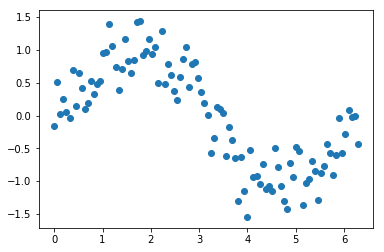

In [270]:
plt.scatter(X,y)

In [296]:
def k(x,x_): # カーネルの中身はブラックボックスでOK
    d = x-x_
    sigma = 1
    h = np.exp(-(d**2)/(2*sigma))
    return h

In [297]:
X = X.reshape(-1,1)

In [298]:
K = k(X,X.T) # グラム行列を計算
K.shape #  このサイズの逆行列を計算しなくてはならない

(100, 100)

In [326]:
la = 1e-1 # 　lambda
LI = np.eye(K.shape[0]) * la # lambdaと単位行列の積
inv = np.linalg.inv(K+LI) # 正則化項がついたグラム行列の逆行列
a = inv.dot(y) # 式(6.8)
preds = kn.T.dot(a) # 式(6.9)

In [327]:
grid = np.linspace(0, 2 * np.pi, num=200) # numを大きくするとsin関数、近似を正確に描画できる
grid = grid.reshape(-1,1)
kn = k(X,grid.T)
kn.shape

(100, 200)

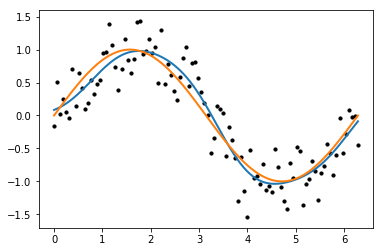

In [328]:
plt.scatter(X,y,s=10,c='black')
plt.plot(grid,preds,lw=2) # blue
plt.plot(grid,np.sin(grid),lw=2) # red